In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
portfolio3 = pd.read_csv('df_portfolio3_without4.csv')
portfolio4 = pd.read_csv('df_portfolio4.csv')
portfolio1 = pd.read_csv('df_portfolio1.csv')
portfolio2 = pd.read_csv('df_portfolio2_without4.csv')
market = pd.read_csv('market_clean_enconded.csv')

In [5]:
portfolio1 = portfolio1.drop(['Unnamed: 0'], axis = 1)
portfolio2 = portfolio2.drop(['Unnamed: 0'], axis = 1)
portfolio3 = portfolio3.drop(['Unnamed: 0'], axis = 1)
portfolio4 = portfolio4.drop(['Unnamed: 0'], axis = 1)
market = market.drop(['Unnamed: 0'], axis = 1)

In [6]:
market_noID = market.copy()

In [28]:
market_noID.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,...,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,0.468908,-0.049577,-0.040442,-0.218332,3.206583e-14,0.177374,0.128755,0.0,0.077506,-0.048349,...,32,10,19,4,0,0,6,48,2,2
1,-0.882484,-0.049577,-0.040442,-1.741135,-8.700907e-01,-0.174786,-1.571173,0.0,-0.019695,-0.048772,...,3,3,16,2,1,1,4,69,10,10
2,-0.296966,-0.049577,-0.040442,0.107983,-6.164806e-01,-0.174786,-1.071194,0.0,-0.025017,-0.048795,...,86,20,2,0,0,2,2,43,1,1
3,-0.357370,-0.049577,-0.040442,0.107983,-8.630394e-01,-0.174786,-0.671211,0.0,-0.019695,-0.048772,...,74,17,2,0,0,2,2,43,10,10
4,-0.701843,-0.049577,-0.040442,0.216755,1.623920e+00,-0.174786,0.010406,0.0,-0.019695,-0.048772,...,77,8,19,4,0,0,6,48,10,10


In [9]:
market_noID.drop('id',axis=1,inplace=True)

In [11]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Modelo com o KMeans

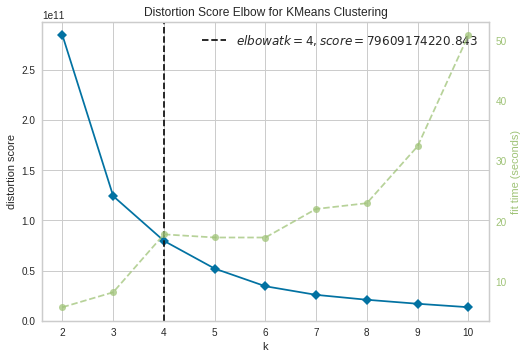

In [12]:
model = KMeans()
visualizer = KElbowVisualizer(model)
visualizer.fit(market_noID)        

# Fit the data to the visualizer
visualizer.show() 

In [15]:
#Instanciando o objeto
km = KMeans(4)
#Ajustando aos dados
km.fit(market_noID)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(market_noID)

pd.DataFrame(y_pred)[0].value_counts()

1    144108
0    122143
3    102261
2     93786
Name: 0, dtype: int64

In [17]:
#Criando uma coluna com os resultados das predições
X_train = market_noID.copy()
X_train['km'] = km.predict(market_noID)

In [18]:
#verificando se a coluna foi criada
X_train.columns

Index(['idade_empresa_anos', 'vl_total_veiculos_pesados_grupo',
       'vl_total_veiculos_leves_grupo', 'nu_meses_rescencia',
       'empsetorcensitariofaixarendapopulacao', 'qt_socios',
       'idade_media_socios', 'qt_socios_feminino',
       'vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux',
       'qt_filiais', 'fl_matriz', 'fl_me', 'fl_sa', 'fl_mei', 'fl_ltda',
       'fl_st_especial', 'fl_email', 'fl_telefone', 'fl_rm',
       'fl_optante_simples', 'fl_passivel_iss', 'de_natureza_juridica',
       'sg_uf', 'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_emp_cat',
       'dt_situacao', 'nm_divisao', 'nm_segmento', 'sg_uf_matriz',
       'de_saude_tributaria', 'de_saude_rescencia', 'de_nivel_atividade',
       'nm_meso_regiao', 'nm_micro_regiao', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo', 'km'],
      dtype='object')

In [30]:
y_pred = km.fit_predict(portfolio1.drop('id',axis=1))

In [31]:
pd.DataFrame(y_pred)[0].value_counts()

1    178
3    139
0    122
2    116
Name: 0, dtype: int64

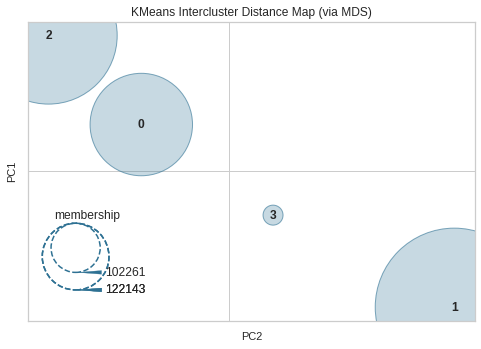

In [19]:
#Verificando as distancias entre os novos clusters criados
from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance

model = KMeans(4)
visualizer = InterclusterDistance(model)
visualizer.fit(X_train)    
visualizer.show()    

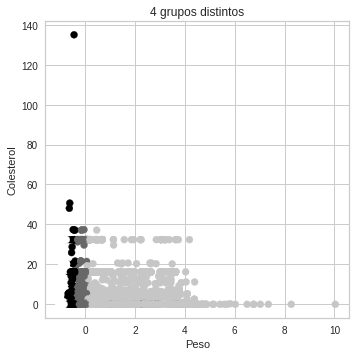

In [23]:
dados_array = market_noID.values
plt.figure(figsize=(12, 12))
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(dados_array)
plt.subplot(221)
plt.scatter(dados_array[:,0], dados_array[:, 1], c=y_pred)
plt.title("4 grupos distintos")
plt.ylabel('Colesterol')
plt.xlabel('Peso')
plt.show()

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)

projected = pca.fit_transform(market_noID)

print(f"Original shape: {market_noID.shape}, projected shape: {projected.shape}")

Original shape: (462298, 39), projected shape: (462298, 2)


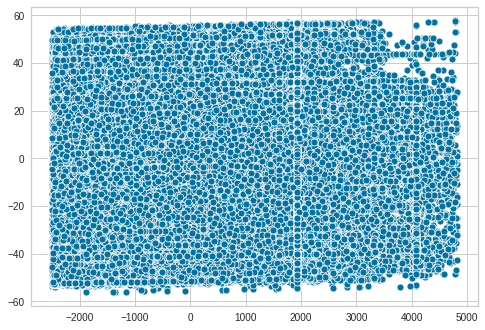

In [27]:
sns.scatterplot(projected[:, 0], projected[:, 1])